In [1]:
USER = 'Andrea'

In [2]:
import sys
import os
if (colab := 'google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive')
    BASE_PATH = '/content/drive/Shareddrives/Project_ML_23/' + USER + '/machine-learning-project'
    sys.path.insert(0,BASE_PATH)
    N_JOBS = 1
    sys.path.insert(0,BASE_PATH + '/src/utils')
    !pip install optuna
    !pip install scikit-learn
    !pip install scikeras 
    TRAIN_DATA = os.path.join(BASE_PATH, 'datasets', 'cup2023', 'ML-CUP23-TR.csv') 
    IMAGES_DIR = os.path.join(BASE_PATH, 'images', 'cup2023', 'comparisons')
    MODELS_DIR = os.path.join(BASE_PATH, 'trained_models', 'cup2023')

else :
    N_JOBS = -1  
    TRAIN_DATA = os.path.join('..', '..', 'datasets', 'cup2023', 'ML-CUP23-TR.csv')
    IMAGES_DIR = os.path.join('..', '..', 'images', 'cup2023', 'comparisons')
    MODELS_DIR = os.path.join('..', '..', 'trained_models', 'cup2023')

RF_MODEL = os.path.join(MODELS_DIR, 'random_forest_model.joblib')
SVM_MODEL = os.path.join(MODELS_DIR, 'SVR_model.joblib')
#NN_MODEL = os.path.join(MODELS_DIR, 'NN_model.joblib')

In [3]:
if (colab := 'google.colab' in sys.modules):
    sys.path.append(BASE_PATH + '/src/utils')
else:
    sys.path.append('../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

from utils import save_plot

/Users/paolomollica/Projects/data-spell-projects/machine-learning-project/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Data processing

In [4]:
# To skip the first column (row indexes)
columns_to_read = list(range(1, 14))

df_train = pd.read_csv(TRAIN_DATA, header=None, comment='#', usecols=columns_to_read, delimiter=',')
df_train = df_train.astype('float64') # casting
df_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
1,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
2,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
3,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
4,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251


In [5]:
features = ['feature_' + str(i) for i in range(1, 11)]
targets = ['target_x', 'target_y', 'target_z']

# Rename columns
new_column_names = features + targets
df_train.columns = new_column_names

df_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target_x,target_y,target_z
0,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
1,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
2,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
3,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
4,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251


In [6]:
from sklearn.model_selection import train_test_split

X = df_train[features].to_numpy()
y = df_train[targets].to_numpy()

# Use seed 42 to have the same split we used in our models
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.shape

(200, 3)

In [7]:
from joblib import load

models = {
    'Support Vector Regressor': {'abbreviation': 'svr', 'model': load(SVM_MODEL)}, 
    'Random Forest': {'abbreviation': 'rf', 'model': load(RF_MODEL)}
}

In [8]:
# Predictions of the models
predictions = {}
for model_name, inner_dict in models.items():
    predictions[model_name] = inner_dict['model'].predict(X_test)

## Individual coordinates scatter plot

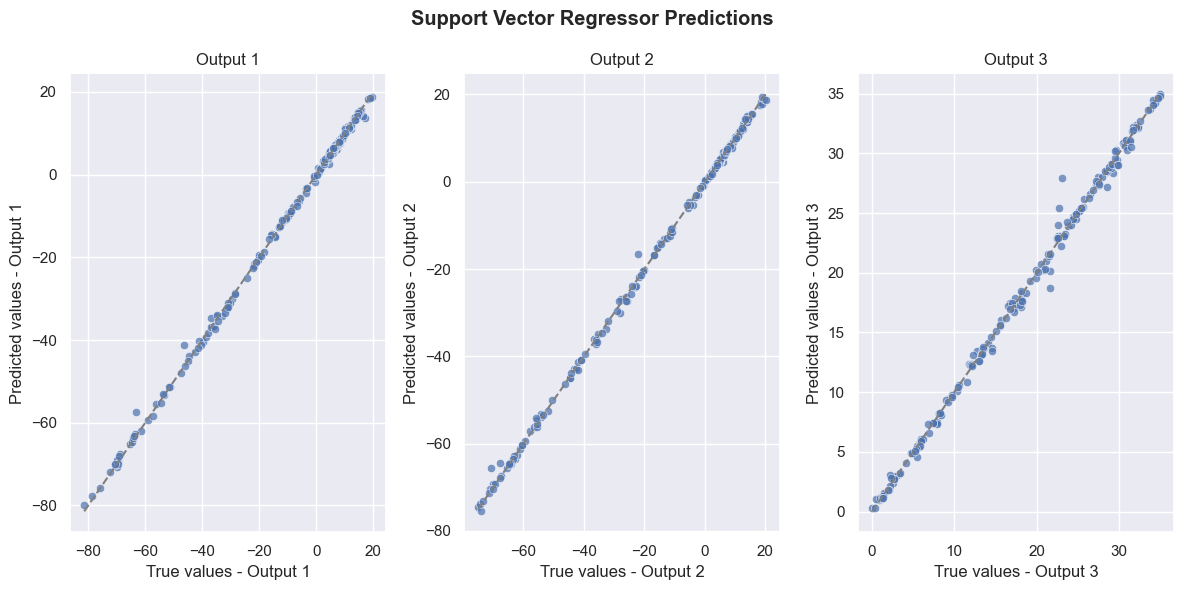

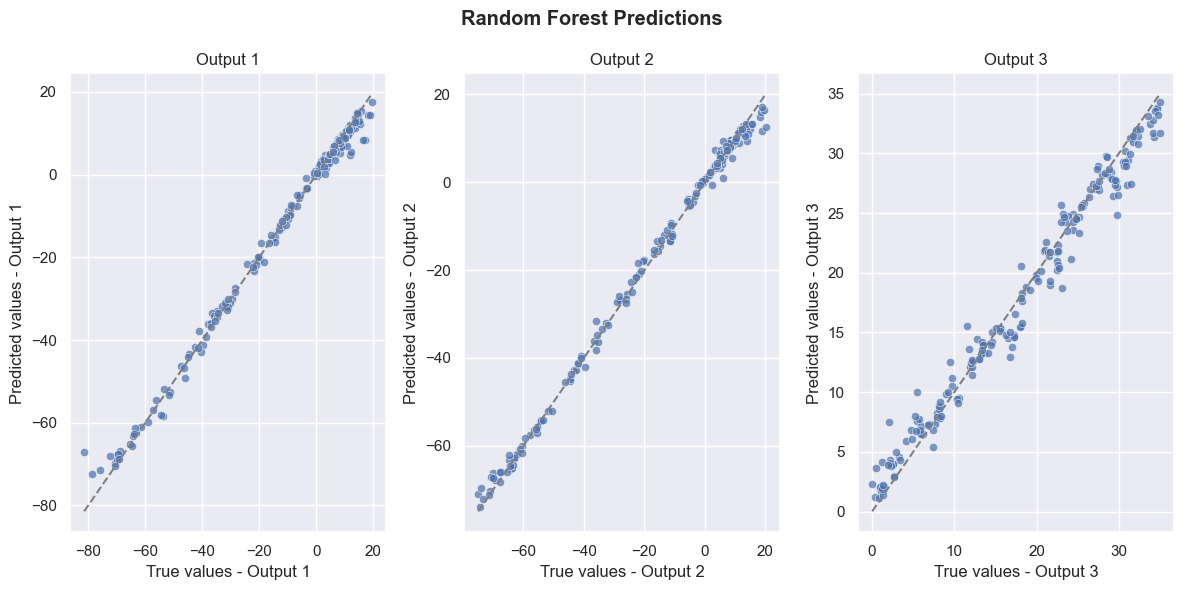

In [9]:
for model_name, prediction in predictions.items():
    plt.figure(figsize=(12, 6))
    
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        sns.scatterplot(
            x=y_test[:, i], 
            y=prediction[:, i], 
            # label=model_name, 
            marker='o', 
            alpha=0.7
        )
        plt.plot(
            [min(y_test[:, i]), max(y_test[:, i])], 
            [min(y_test[:, i]), max(y_test[:, i])], 
            linestyle='--', 
            color='gray'
        )
    
        plt.xlabel(f'True values - Output {i+1}')
        plt.ylabel(f'Predicted values - Output {i+1}')
        plt.title(f'Output {i+1}')

    plt.suptitle(f'{model_name} Predictions', fontweight='bold')  
    plt.tight_layout()
    # plt.legend()
    model_abbreviation = models[model_name]['abbreviation']
    save_plot(plt, IMAGES_DIR, f'{model_abbreviation}_individual_coordinates_scatterplot')
    plt.show()

## Contributions to MEE

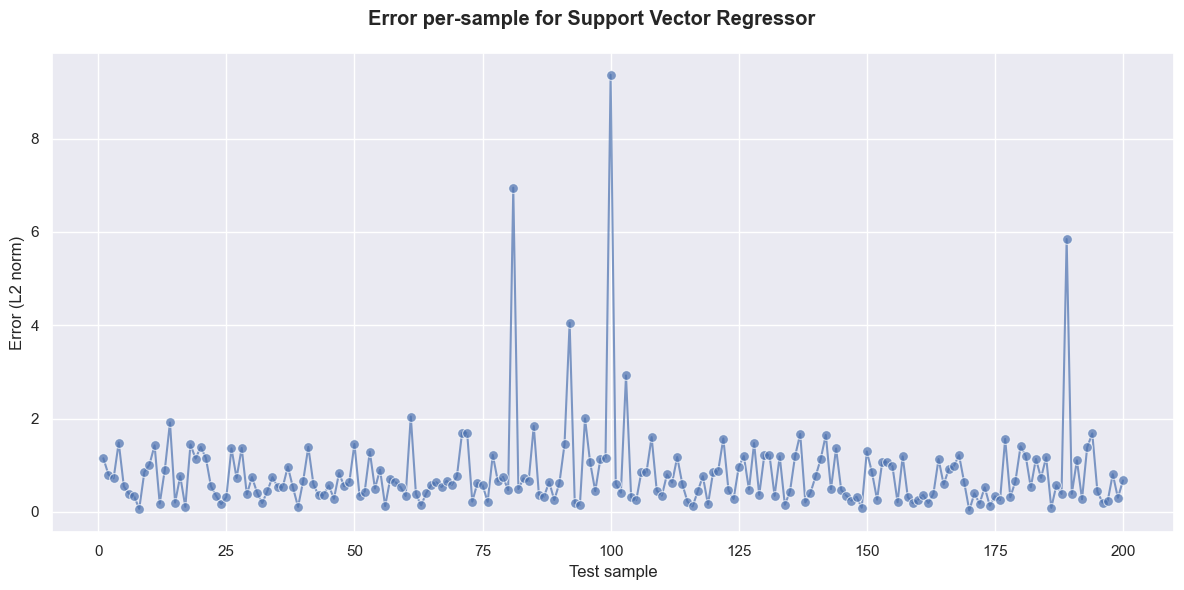

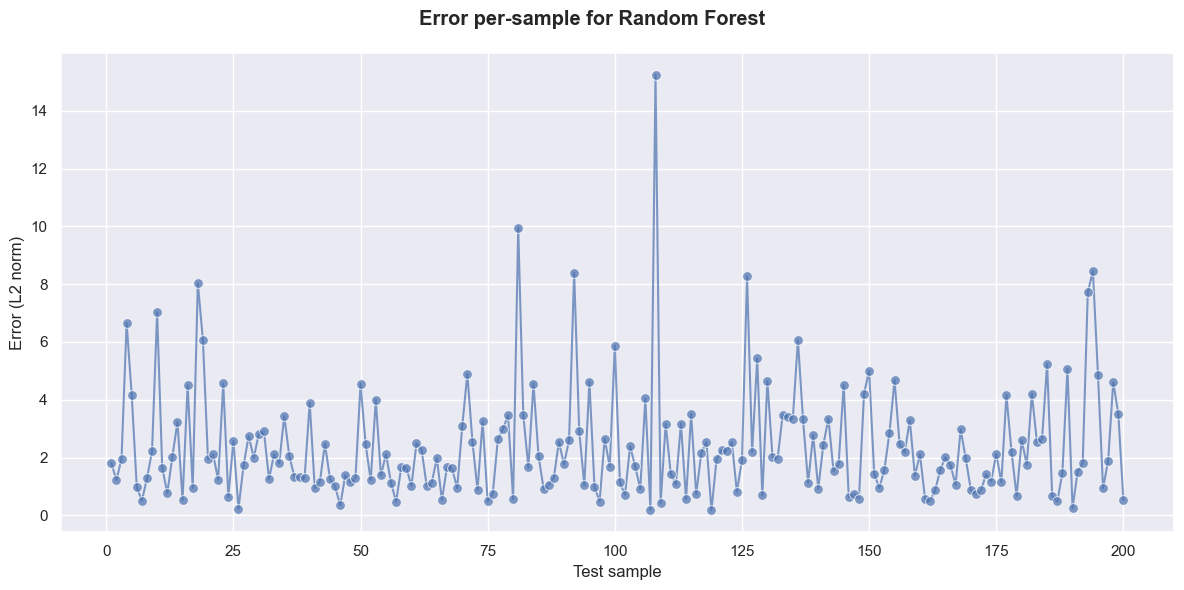

In [10]:
for model_name, prediction in predictions.items():
    plt.figure(figsize=(12, 6))

    sns.lineplot(
        x=range(1, y_test.shape[0] + 1), 
        y=[np.linalg.norm((y_test - prediction)[i, :]) for i in range(y_test.shape[0])], 
        # label=model_name, 
        linestyle='-', 
        marker='o', 
        markersize=7, 
        alpha=0.7
    )

    plt.xlabel('Test sample')
    plt.ylabel('Error (L2 norm)')
    plt.suptitle(f'Error per-sample for {model_name}', fontweight='bold')
    plt.tight_layout()
    # plt.legend()
    model_abbreviation = models[model_name]['abbreviation']
    save_plot(plt, IMAGES_DIR, f'{model_abbreviation}_error_per_sample')
    plt.show()

## 3D scatter plot

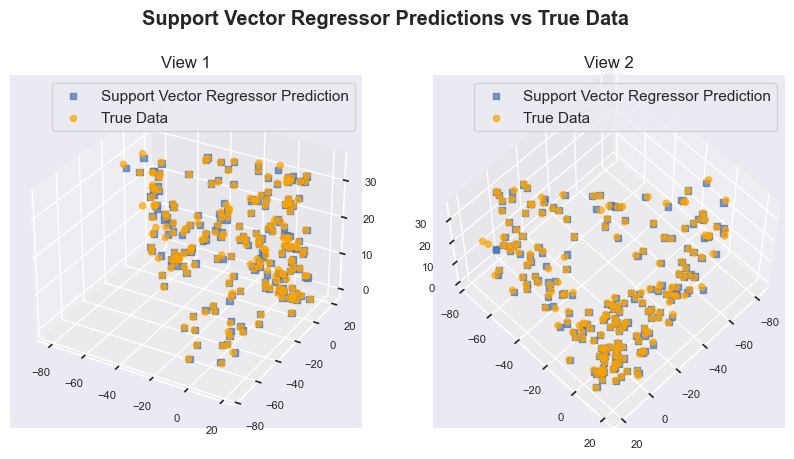

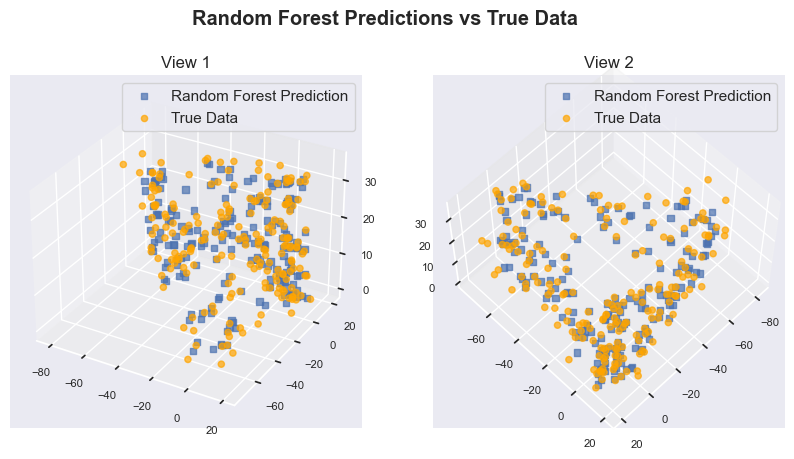

In [11]:
for model_name, prediction in predictions.items():
    fig = plt.figure(figsize=(10, 5))

    # First subplot
    ax1 = fig.add_subplot(121, projection='3d')

    # Predictions
    ax1.scatter(
        prediction[:,0], prediction[:,1], prediction[:,2],
        label=f'{model_name} Prediction',
        marker='s',
        alpha=0.7
    )

    # True data
    ax1.scatter(
        y_test[:,0], y_test[:,1], y_test[:,2],
        label='True Data',
        marker='o',
        alpha=0.7,
        color='orange'
    )

    ax1.set_title('View 1')
    ax1.legend()
    for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax1.get_zticklabels()):
        label.set_fontsize(8)

    # Second subplot: another view of the same plot
    ax2 = fig.add_subplot(122, projection='3d')

    # Predictions
    ax2.scatter(
        prediction[:,0], prediction[:,1], prediction[:,2],
        label=f'{model_name} Prediction',
        marker='s',
        alpha=0.7
    )

    # True data
    ax2.scatter(
        y_test[:,0], y_test[:,1], y_test[:,2],
        label='True Data',
        marker='o',
        alpha=0.7,
        color='orange'
    )

    ax2.view_init(elev=60, azim=45)
    ax2.set_title('View 2')
    ax2.legend()
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels() + ax2.get_zticklabels()):
        label.set_fontsize(8)

    plt.suptitle(f'{model_name} Predictions vs True Data', fontweight='bold')
    plt.subplots_adjust(wspace=0.2)
    model_abbreviation = models[model_name]['abbreviation']
    save_plot(plt, IMAGES_DIR, f'{model_abbreviation}_3d_scatterplot')
    plt.show()